In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 25

In [4]:

dataset_directory = "Newdataset"
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_directory,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 13380 files belonging to 38 classes.


In [5]:
class_names = dataset.class_names
print(f"Name of classes: {class_names}")
print(f"Number of batches in the dataset: {len(dataset)}")

Name of classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'T

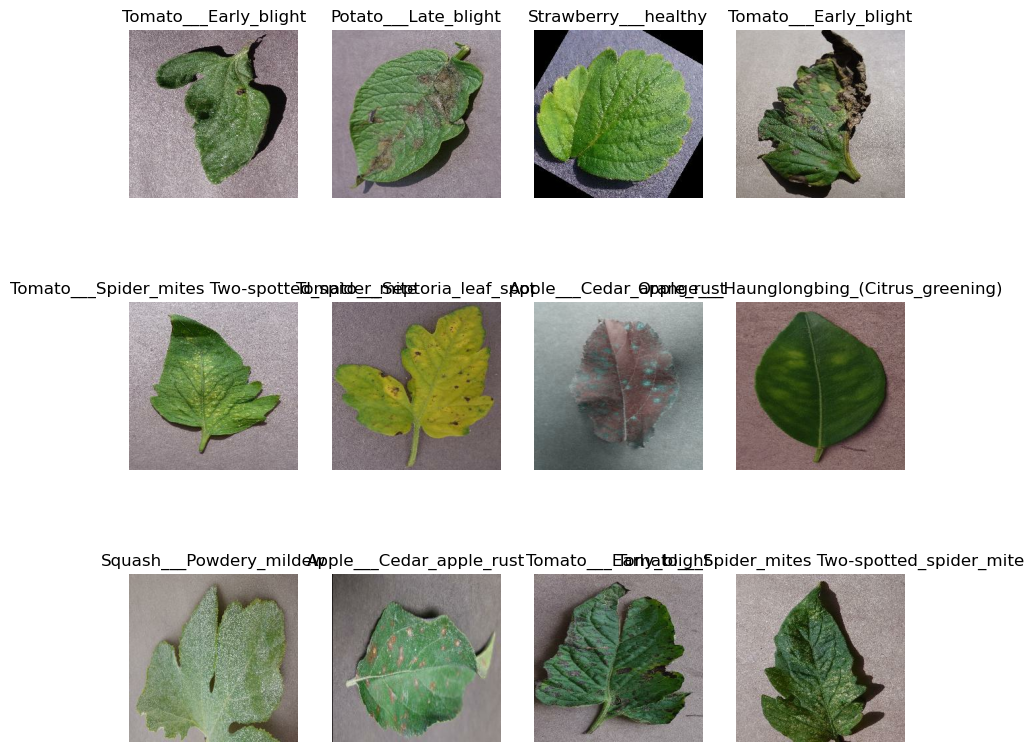

In [14]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")
plt.show()

(32, 256, 256, 3)
[31  5 34  7 27 19 24  4 14  0 23 37 29 30  2 23  2 23  7 22 22 15 24 16
 26 18  9  9 30 31 14  2]


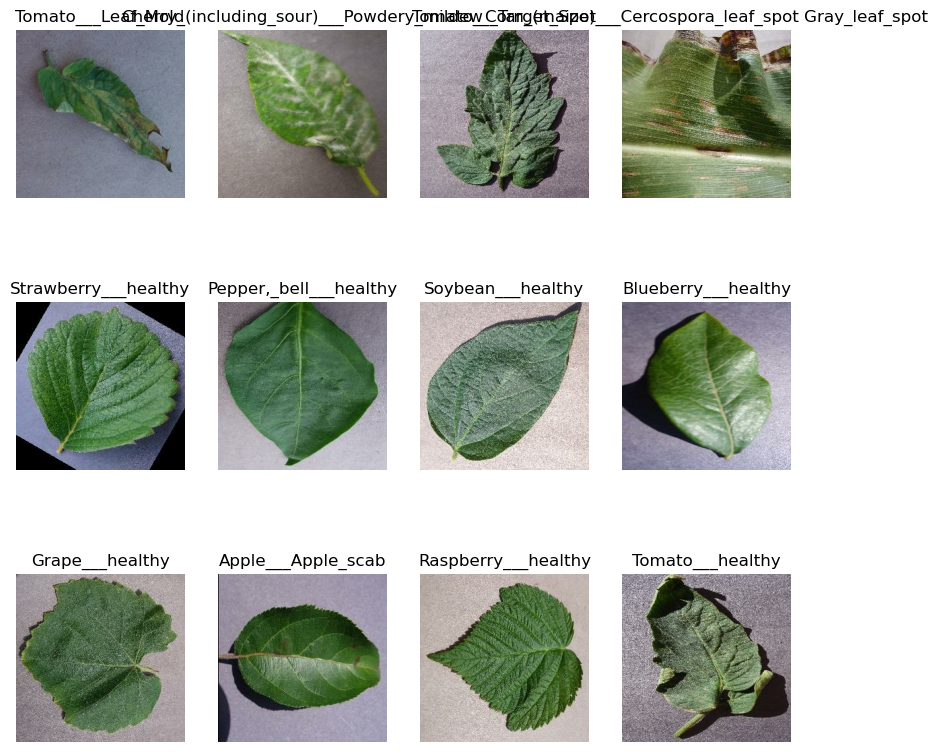

In [15]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [18]:
train_size = 0.8 
len(dataset)*train_size

335.20000000000005

In [20]:
train_ds = dataset.take(335) 
len(train_ds)

335

In [22]:
test_ds = dataset.skip(335)
len(test_ds)

84

In [24]:
val_size=0.1
len(dataset) *val_size

41.900000000000006

In [26]:
val_ds = test_ds.take(41) 
len(val_ds)

41

In [28]:
test_ds = test_ds.skip(41)
len(test_ds)

43

In [30]:
# --- 5. परफॉरमेंस के लिए डेटासेट को कैश और प्रीफेच करें ---
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [32]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[175. 172. 167.]
  [175. 172. 167.]
  [174. 171. 166.]
  ...
  [168. 163. 157.]
  [168. 163. 157.]
  [167. 162. 156.]]

 [[175. 172. 167.]
  [174. 171. 166.]
  [174. 171. 166.]
  ...
  [168. 163. 157.]
  [168. 163. 157.]
  [168. 163. 157.]]

 [[174. 171. 166.]
  [174. 171. 166.]
  [173. 170. 165.]
  ...
  [169. 164. 158.]
  [168. 163. 157.]
  [168. 163. 157.]]

 ...

 [[ 62.  57.  53.]
  [ 62.  57.  53.]
  [ 63.  58.  54.]
  ...
  [ 64.  60.  51.]
  [ 65.  61.  52.]
  [ 65.  61.  52.]]

 [[ 65.  60.  56.]
  [ 65.  60.  56.]
  [ 65.  60.  56.]
  ...
  [ 62.  58.  49.]
  [ 62.  58.  49.]
  [ 63.  59.  50.]]

 [[ 69.  64.  60.]
  [ 68.  63.  59.]
  [ 67.  62.  58.]
  ...
  [ 60.  56.  47.]
  [ 61.  57.  48.]
  [ 61.  57.  48.]]]


In [34]:
# रिसाइजिंग और रीस्केलिंग लेयर
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255)
])

# डेटा ऑग्मेंटेशन लेयर
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2)
])

In [36]:
# --- 7. ट्रेनिंग डेटासेट पर डेटा ऑग्मेंटेशन लागू करें ---
# ध्यान दें: ऑग्मेंटेशन केवल ट्रेनिंग डेटा पर लागू किया जाता है
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# यह कोड अगले वीडियो में मॉडल बनाने और ट्रेनिंग के लिए डेटा को पूरी तरह से तैयार कर देता है।
print("डेटा प्रीप्रोसेसिंग और ऑग्मेंटेशन पूरा हुआ। अब डेटा मॉडल ट्रेनिंग के लिए तैयार है।")

डेटा प्रीप्रोसेसिंग और ऑग्मेंटेशन पूरा हुआ। अब डेटा मॉडल ट्रेनिंग के लिए तैयार है।


In [38]:
BATCH_SIZE

32

In [56]:
# --- 1. मॉडल आर्किटेक्चर बनाना ---
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 38 # आलू की बीमारियों के तीन वर्ग (Early Blight, Late Blight, Healthy)

# लेयर्स को एक क्रम में जोड़कर मॉडल बनाएं
model = models.Sequential([
    # इनपुट लेयर: इमेज को रीसाइज और नार्मलाइज करें
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
    
    # डेटा ऑग्मेंटेशन लेयर
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    
    # कन्वोल्यूशनल लेयर्स
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # न्यूरॉन्स को समतल (flatten) करें
    layers.Flatten(),
    
    # डेंस लेयर
    layers.Dense(64, activation='relu'),
    
    # आउटपुट लेयर (n_classes न्यूरॉन्स के साथ)
    layers.Dense(n_classes, activation='softmax'),
])

# इनपुट शेप के साथ मॉडल को बिल्ड करें
model.build(input_shape=input_shape)

C:\Users\rajpo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_3 (Resizing)                │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_flip_3 (RandomFlip)           │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_3 (RandomRotation)   │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (32, 38)                    │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 186,022 (726.65 KB)

 Trainable params: 186,022 (726.65 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# --- 3. मॉडल को कंपाइल करें ---
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [62]:
# --- 4. मॉडल को ट्रेन करें ---
# ट्रेनिंग प्रक्रिया की हिस्ट्री को सेव करें
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/25
335/335 ━━━━━━━━━━━━━━━━━━━━ 638s 2s/step - accuracy: 0.0409 - loss: 3.5623 - val_accuracy: 0.1562 - val_loss: 3.0562
Epoch 2/25
335/335 ━━━━━━━━━━━━━━━━━━━━ 616s 2s/step - accuracy: 0.1921 - loss: 2.8886 - val_accuracy: 0.3277 - val_loss: 2.3441
Epoch 3/25
335/335 ━━━━━━━━━━━━━━━━━━━━ 630s 2s/step - accuracy: 0.3425 - loss: 2.1837 - val_accuracy: 0.3971 - val_loss: 2.1300
Epoch 4/25
335/335 ━━━━━━━━━━━━━━━━━━━━ 630s 2s/step - accuracy: 0.4683 - loss: 1.7397 - val_accuracy: 0.5312 - val_loss: 1.5048
Epoch 5/25
335/335 ━━━━━━━━━━━━━━━━━━━━ 621s 2s/step - accuracy: 0.5383 - loss: 1.4743 - val_accuracy: 0.4764 - val_loss: 1.7344
Epoch 6/25
335/335 ━━━━━━━━━━━━━━━━━━━━ 620s 2s/step - accuracy: 0.6152 - loss: 1.2158 - val_accuracy: 0.4741 - val_loss: 1.7430
Epoch 7/25
335/335 ━━━━━━━━━━━━━━━━━━━━ 1055s 3s/step - accuracy: 0.6704 - loss: 1.0382 - val_accuracy: 0.5434 - val_loss: 1.4785
Epoch 8/25
335/335 ━━━━━━━━━━━━━━━━━━━━ 1200s 4s/step - accuracy: 0.6988 - loss: 0.9388 - val_ac

In [72]:
# --- 5. टेस्ट डेटासेट पर मॉडल का मूल्यांकन करें ---
scores = model.evaluate(test_ds)
print(f"टेस्ट लॉस: {scores[0]}")
print(f"टेस्ट एक्यूरेसी: {scores[1]}")

43/43 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.7806 - loss: 1.1180
टेस्ट लॉस: 0.8280499577522278
टेस्ट एक्यूरेसी: 0.7900593280792236


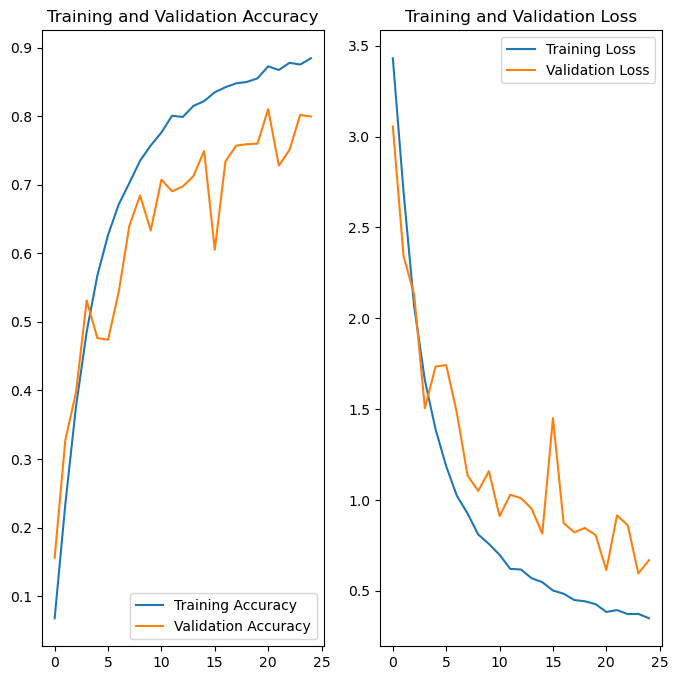

In [79]:
# --- 6. ट्रेनिंग की हिस्ट्री को विज़ुअलाइज़ करें ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

पहली इमेज पर प्रेडिक्शन:
एक्चुअल लेबल: Tomato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
प्रेडिक्टेड लेबल: Tomato___healthy


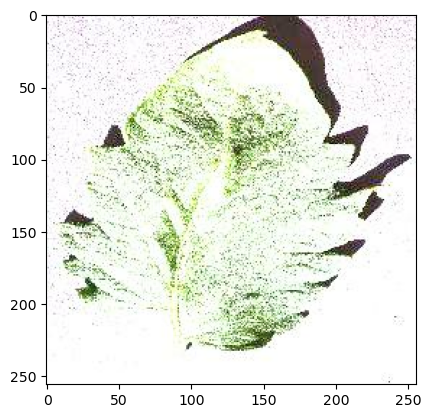

In [83]:
# --- 7. कुछ इमेज पर प्रेडिक्शन करें ---[same image]
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("पहली इमेज पर प्रेडिक्शन:")
    plt.imshow(first_image)
    print(f"एक्चुअल लेबल: {class_names[first_label]}")
    
    batch_prediction = model.predict(images_batch)
    predicted_class = class_names[np.argmax(batch_prediction[0])]
    print(f"प्रेडिक्टेड लेबल: {predicted_class}")

पहली इमेज पर प्रेडिक्शन:
एक्चुअल लेबल: Tomato___Leaf_Mold
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
प्रेडिक्टेड लेबल: Tomato___Leaf_Mold


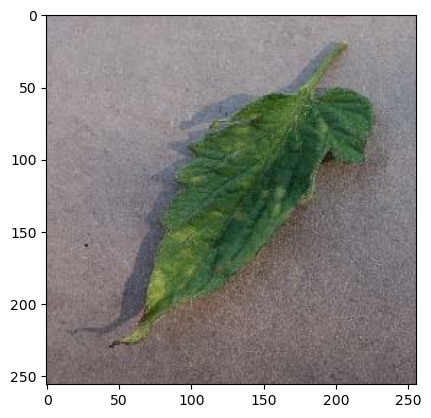

In [94]:
# --- 7. कुछ इमेज पर प्रेडिक्शन करें --- [ skip pr 2nd pic]
for images_batch, labels_batch in test_ds.skip(2).take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("पहली इमेज पर प्रेडिक्शन:")
    plt.imshow(first_image)
    print(f"एक्चुअल लेबल: {class_names[first_label]}")
    
    batch_prediction = model.predict(images_batch)
    predicted_class = class_names[np.argmax(batch_prediction[0])]
    print(f"प्रेडिक्टेड लेबल: {predicted_class}")

एक रैंडम इमेज पर प्रेडिक्शन:


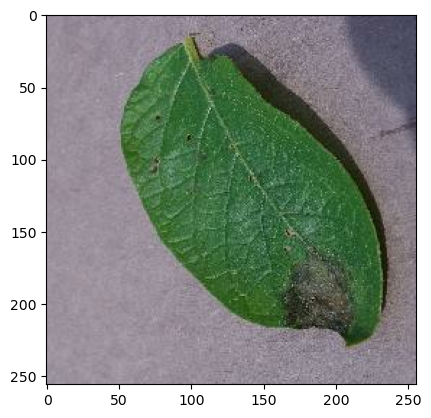

एक्चुअल लेबल: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
प्रेडिक्टेड लेबल: Tomato___Tomato_mosaic_virus


In [133]:
# --- 7. कुछ इमेज पर प्रेडिक्शन करें (शफल के साथ) ---[ random image pr prediction]

# test_ds.shuffle(1000).take(1) हर बार एक रैंडम बैच उठाएगा
for images_batch, labels_batch in test_ds.shuffle(buffer_size=1000).take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("एक रैंडम इमेज पर प्रेडिक्शन:")
    plt.imshow(first_image)
    plt.show() # इमेज को ठीक से दिखाने के लिए
    
    print(f"एक्चुअल लेबल: {class_names[first_label]}")
    
    # प्रेडिक्शन के लिए इमेज का आकार बदलना पड़ सकता है
    img_array = tf.expand_dims(images_batch[0], 0) # Create a batch

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    
    print(f"प्रेडिक्टेड लेबल: {predicted_class}")

In [136]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array =tf.expand_dims(img_array, 0) # Create a batch
    predictions= model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


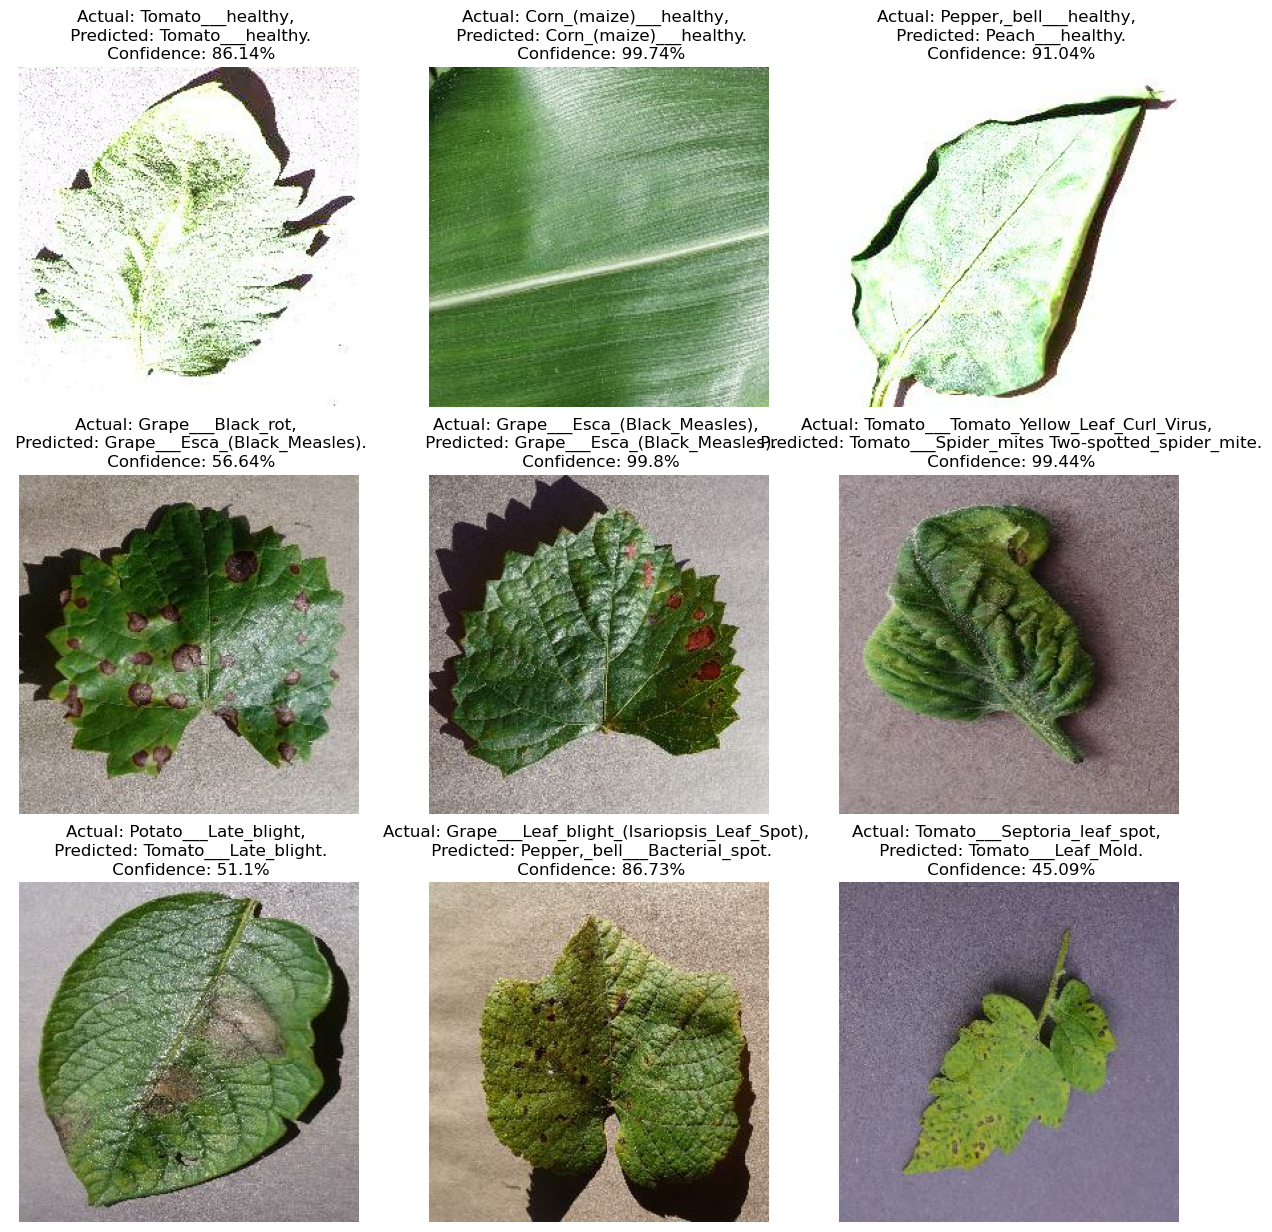

In [139]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax =plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class= class_names [labels[i]]
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [150]:
#  save in keras
import os

# Find the next version number
# Ensure the models directory exists
if not os.path.exists("../Extended_models"):
    os.makedirs("../Extended_models")

# Get a list of existing version numbers from filenames
versions = [int(f.split('.')[0]) for f in os.listdir("../Extended_models") if f.endswith('.keras')]
model_version = max(versions + [0]) + 1

# Save the model with the correct file extension
model.save(f"../Extended_models/{model_version}.keras")

print(f"Model successfully saved as ../Extended_models{model_version}.keras")

Model successfully saved as ../Extended_models1.keras


In [153]:
# save in .h5
import os

# डायरेक्टरी मौजूद है या नहीं, यह सुनिश्चित करें
if not os.path.exists("../Extended_models"):
    os.makedirs(".../Extended_models")

# मौजूदा वर्ज़न नंबरों की सूची प्राप्त करें
versions = [int(f.split('.')[0]) for f in os.listdir("../Extended_models") if f.endswith('.h5')]
model_version = max(versions + [1]) + 1

# मॉडल को सही फाइल एक्सटेंशन के साथ सेव करें
model.save(f"../Extended_models/{model_version}.h5")

print(f"Model successfully saved as ../Extended_models/{model_version}.h5")

Model successfully saved as ../Extended_models/2.h5


In [156]:
model.save("2.h5")

In [163]:
model.save("1.keras")
print(f"Model successfully saved as ../Extended_models/keras")

Model successfully saved as ../Extended_models/keras
